In [1]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hnmchallenge.dataset import Dataset
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *

In [2]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [4]:
dataset = FilterdDataset()
dr = DataReader()

In [7]:
fd = dr.get_filtered_full_data()

In [12]:
duplicated_rows = fd[fd.duplicated(subset=[DEFAULT_USER_COL, DEFAULT_ITEM_COL])]

In [19]:
print("Count of all unique items")
len(fd[DEFAULT_ITEM_COL].unique())

Count of all unique items


22069

In [18]:
print("Item that have been bought at least once twice from the same user:")
len(duplicated_rows[DEFAULT_ITEM_COL].unique())

Item that have been bought at least once twice from the same user:


19776

In [20]:
count_mb = duplicated_rows.groupby(DEFAULT_ITEM_COL).count()

<AxesSubplot:>

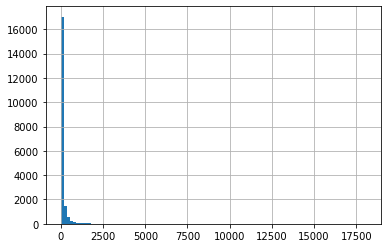

In [23]:
count_mb["price"].hist(bins=100)

In [40]:
count_mb.reset_index()[[DEFAULT_ITEM_COL, "t_dat"]].rename(columns={"t_dat":"count"})

,article_id,count
0,0,633
1,1,335
2,2,168
3,3,457
4,4,2331
...,...,...
19771,22051,1
19772,22057,1
19773,22060,1
19774,22062,1


In [30]:
count_mb[count_mb["price"]<100]

,t_dat,customer_id,price,sales_channel_id
article_id,,,,
15,50,50,50,50
23,14,14,14,14
24,92,92,92,92
38,4,4,4,4
42,41,41,41,41
...,...,...,...,...
22051,1,1,1,1
22057,1,1,1,1
22060,1,1,1,1
